### ВЫДЕЛЕНИЕ ИТОГОВОГО НАБОРА ПОЛЕЙ ДЛЯ ОДНОЙ ЗАПИСИ

*Загружаю данные и все необходимые библиотеки*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
plt.rcParams ['figure.figsize']=(11,4)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,max_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
import nltk

In [2]:
df=pd.read_csv("brooklyn_sales_map.csv")
df.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,...,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,...,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.147631


*Вывожу информацию о данных на экран*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 111 entries, Unnamed: 0 to SHAPE_Area
dtypes: float64(64), int64(11), object(36)
memory usage: 331.0+ MB


*С помощью процедуры $shape$, смотрю размер выборки*

In [4]:
df.shape

(390883, 111)

*Смотрю статистическую таблицу*

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,390883.0,195442.000000,112838.346973,1.000000,97721.500000,195442.000000,293162.500000,3.908830e+05
borough,390883.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00
block,390883.0,4275.651169,2642.765332,1.000000,1786.000000,4305.000000,6585.000000,8.955000e+03
lot,390883.0,272.509986,484.658837,1.000000,21.000000,45.000000,94.000000,9.133000e+03
easement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
FIRM07_FLA,8653.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
PFIRM15_FL,27773.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
MAPPLUTO_F,303728.0,0.000244,0.036740,0.000000,0.000000,0.000000,0.000000,7.000000e+00
SHAPE_Leng,303728.0,337.445796,329.587401,2.143758,238.997798,249.411350,283.169119,1.986152e+04


*С помощью цикла вывожу тип каждого признака*

In [6]:
for col in df.columns:
    missing=df[col].dtypes
    print('{}-{}'.format(col, missing))

Unnamed: 0-int64
borough-int64
neighborhood-object
building_class_category-object
tax_class-object
block-int64
lot-int64
easement-float64
building_class-object
address-object
apartment_number-object
zip_code-int64
residential_units-int64
commercial_units-int64
total_units-int64
land_sqft-float64
gross_sqft-float64
year_built-int64
tax_class_at_sale-int64
building_class_at_sale-object
sale_price-float64
sale_date-object
year_of_sale-int64
Borough-object
CD-float64
CT2010-float64
CB2010-float64
SchoolDist-float64
Council-float64
ZipCode-float64
FireComp-object
PolicePrct-float64
HealthCent-float64
HealthArea-float64
SanitBoro-float64
SanitDistr-float64
SanitSub-object
Address-object
ZoneDist1-object
ZoneDist2-object
ZoneDist3-object
ZoneDist4-object
Overlay1-object
Overlay2-object
SPDist1-object
SPDist2-object
SPDist3-object
LtdHeight-object
SplitZone-object
BldgClass-object
LandUse-float64
Easements-float64
OwnerType-object
OwnerName-object
LotArea-float64
BldgArea-float64
ComArea-float

### Предобработка данных

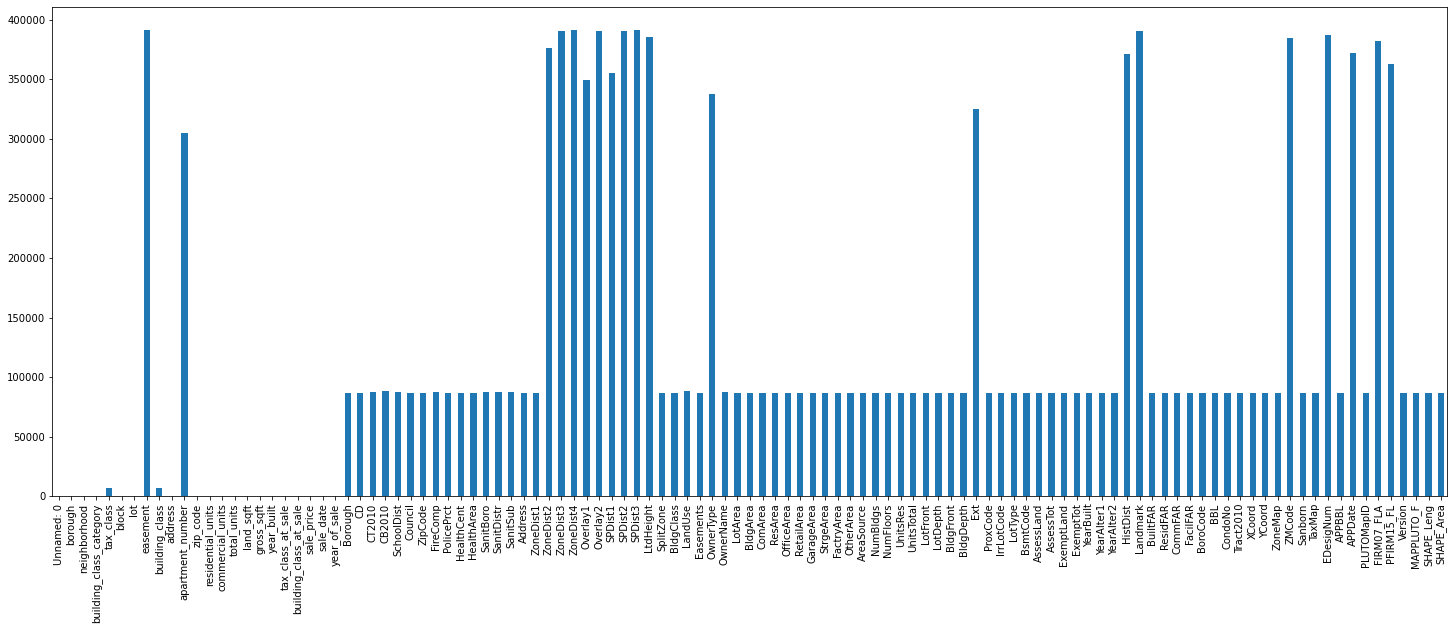

In [7]:
plt.figure(figsize=(25,9))
df.isna().sum().plot(kind='bar')
plt.show();

*Изночально посмотрю пропущенные значения в данных, а признаки которые имеют больше 90% пропусков удалю*

In [8]:
for col in df.columns:
    missing=np.mean(df[col].isnull())
    missing_non=missing*100
    print('{}-{}%'.format(col, round(missing_non)))
    if missing_non>80:
        del df[col]

Unnamed: 0-0%
borough-0%
neighborhood-0%
building_class_category-0%
tax_class-2%
block-0%
lot-0%
easement-100%
building_class-2%
address-0%
apartment_number-78%
zip_code-0%
residential_units-0%
commercial_units-0%
total_units-0%
land_sqft-0%
gross_sqft-0%
year_built-0%
tax_class_at_sale-0%
building_class_at_sale-0%
sale_price-0%
sale_date-0%
year_of_sale-0%
Borough-22%
CD-22%
CT2010-22%
CB2010-23%
SchoolDist-22%
Council-22%
ZipCode-22%
FireComp-22%
PolicePrct-22%
HealthCent-22%
HealthArea-22%
SanitBoro-22%
SanitDistr-22%
SanitSub-22%
Address-22%
ZoneDist1-22%
ZoneDist2-96%
ZoneDist3-100%
ZoneDist4-100%
Overlay1-89%
Overlay2-100%
SPDist1-91%
SPDist2-100%
SPDist3-100%
LtdHeight-99%
SplitZone-22%
BldgClass-22%
LandUse-23%
Easements-22%
OwnerType-86%
OwnerName-22%
LotArea-22%
BldgArea-22%
ComArea-22%
ResArea-22%
OfficeArea-22%
RetailArea-22%
GarageArea-22%
StrgeArea-22%
FactryArea-22%
OtherArea-22%
AreaSource-22%
NumBldgs-22%
NumFloors-22%
UnitsRes-22%
UnitsTotal-22%
LotFront-22%
LotDepth-

*Заменю пропущенные значения номинативных признаков, модой числа*

In [9]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top']
        df[col] = df[col].fillna(top)

imputing missing values for: building_class_category
imputing missing values for: tax_class
imputing missing values for: building_class
imputing missing values for: address
imputing missing values for: apartment_number
imputing missing values for: Borough
imputing missing values for: FireComp
imputing missing values for: SanitSub
imputing missing values for: Address
imputing missing values for: ZoneDist1
imputing missing values for: SplitZone
imputing missing values for: BldgClass
imputing missing values for: OwnerName
imputing missing values for: IrrLotCode
imputing missing values for: ZoneMap
imputing missing values for: Sanborn
imputing missing values for: Version


*Заменю пропущенные значения количественных признаков, медианным значением*

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: CD
imputing missing values for: CT2010
imputing missing values for: CB2010
imputing missing values for: SchoolDist
imputing missing values for: Council
imputing missing values for: ZipCode
imputing missing values for: PolicePrct
imputing missing values for: HealthCent
imputing missing values for: HealthArea
imputing missing values for: SanitBoro
imputing missing values for: SanitDistr
imputing missing values for: LandUse
imputing missing values for: Easements
imputing missing values for: LotArea
imputing missing values for: BldgArea
imputing missing values for: ComArea
imputing missing values for: ResArea
imputing missing values for: OfficeArea
imputing missing values for: RetailArea
imputing missing values for: GarageArea
imputing missing values for: StrgeArea
imputing missing values for: FactryArea
imputing missing values for: OtherArea
imputing missing values for: AreaSource
imputing missing values for: NumBldgs
imputing missing values for: NumFloors
imp

*Теперь закодирую все категориальные признаки в числа*

In [11]:
lbl=LabelEncoder()

In [12]:
nomeric=df.select_dtypes(exclude=[np.number])
cols=nomeric.columns.values
for col in cols:
    df[col]=lbl.fit_transform(df[col])

### ОТБОР ПРИЗНАКОВ

*Избавлюсь от признаков имеющие большое количество повторений значений, так как они считаются неинформативными*

In [13]:
rows=len(df.index)
information_cols=[]
for col in df.columns:
    conts=df[col].value_counts(dropna=True)
    top_row=(conts/rows).iloc[0]  
    if top_row>0.80:
        del df[col]
        print("{}-{}%".format(col, round(top_row*100)))

borough-100%
commercial_units-89%
Borough-100%
SanitBoro-100%
SplitZone-96%
Easements-99%
ComArea-89%
OfficeArea-98%
RetailArea-93%
GarageArea-99%
StrgeArea-99%
FactryArea-99%
OtherArea-99%
AreaSource-98%
NumBldgs-83%
IrrLotCode-87%
LotType-90%
YearAlter1-89%
YearAlter2-99%
CommFAR-95%
BoroCode-100%
CondoNo-100%
APPBBL-95%
PLUTOMapID-100%
Version-100%
MAPPLUTO_F-100%
building_class_category_ismissing-100%
tax_class_ismissing-98%
building_class_ismissing-98%
address_ismissing-100%


In [14]:
cdf=df.drop('building_class_category', axis=1)
for col in cdf.columns:
    x = np.array(df['building_class_category'])
    y = np.array(cdf[col])
    corr=np.corrcoef(x, y)[0, 1]
    if corr>0.3:
        del cdf[col]
        print('{}: {}'.format(col, corr))

tax_class: 0.8268463973599847
lot: 0.4104294338165765
building_class: 0.5539360546879426
apartment_number: 0.33003954391712365
tax_class_at_sale: 0.9412893582824526
building_class_at_sale: 0.5790139941595679
LandUse: 0.42436201329969436
Borough_ismissing: 0.4647299605084966
FireComp_ismissing: 0.46429904340032485
SanitSub_ismissing: 0.46584235952514463
Address_ismissing: 0.46473266126715423
ZoneDist1_ismissing: 0.46472148315377987
SplitZone_ismissing: 0.4647187977298723
BldgClass_ismissing: 0.4647187977298723
OwnerName_ismissing: 0.46451250647052145
IrrLotCode_ismissing: 0.4647187977298723
ZoneMap_ismissing: 0.4647299605084966
Sanborn_ismissing: 0.46471577117748386
Version_ismissing: 0.4647299605084966
CD_ismissing: 0.4647299605084966
CT2010_ismissing: 0.4649571227284335
CB2010_ismissing: 0.4683675297611546
SchoolDist_ismissing: 0.4647169321652015
Council_ismissing: 0.4647299605084966
ZipCode_ismissing: 0.4647299605084966
PolicePrct_ismissing: 0.4647299605084966
HealthCent_ismissing: 0

*Нормализую данные с помощью стандартизации*

In [15]:
scal=StandardScaler()

In [16]:
scaler=scal.fit_transform(cdf)

### РАЗБИЕНИЕ ОБРАБОТАННЫХ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ

*Для обучения использую 67 % данных, а для тестирования — 33 %*

In [17]:
x=scaler.copy()

In [18]:
y=df['building_class_category']

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=20)

### КЛАССИФИФКАЦИЯ ОБЪЕКТОВ

*Random Forest Classifier*

In [20]:
forest=RandomForestClassifier(n_estimators=500, random_state=10)

In [21]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [22]:
y_pred=forest.predict(x_test)

In [23]:
forest.score(x_test, y_test)

0.9442833664103201

*DecisionTreeClassifier*

In [24]:
tree=DecisionTreeClassifier(random_state=20)

In [25]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [26]:
tree.score(x_test, y_test)

0.9368875589183825

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17838
           1       0.98      0.98      0.98     35157
           2       0.95      0.97      0.96     12674
           3       0.92      0.88      0.90      2940
           4       0.77      0.60      0.68       188
           5       0.78      0.82      0.80      2354
           6       0.94      0.95      0.94        92
           7       0.93      0.65      0.77       296
           8       1.00      0.92      0.96        12
           9       0.95      0.97      0.96      9432
          10       1.00      0.99      0.99       452
          11       0.85      0.90      0.87       719
          12       0.78      0.91      0.84        23
          13       1.00      0.99      0.99      2672
          14       1.00      1.00      1.00       187
          15       1.00      1.00      1.00     10416
          16       1.00      1.00      1.00       678
          17       0.00    

### ПОДБОР АЛГОРИТМОВ ВЫЯВЛЕНИЯ ЗАВИСИМОСТЕЙ ПОЛЕЙ ДАННЫХ

*Посмотрю как зависят некоторые признаки попарно*

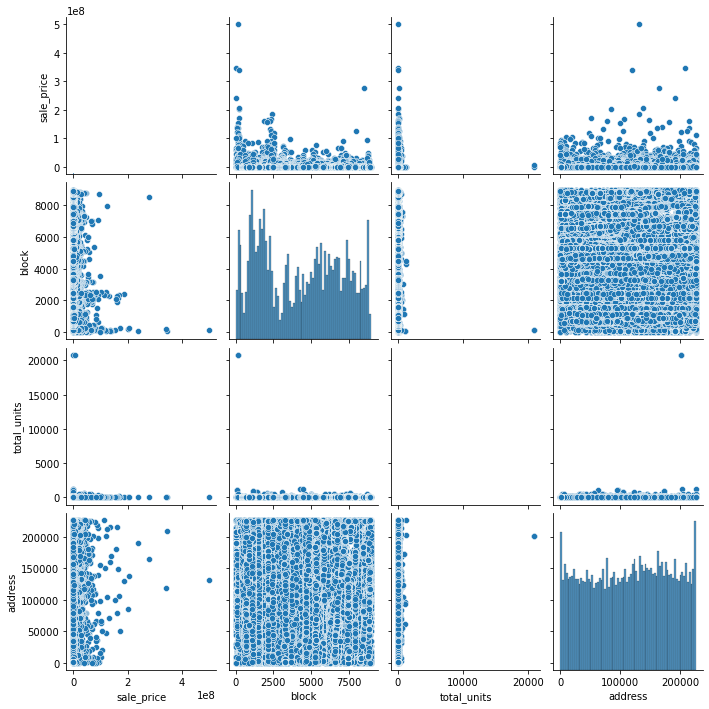

In [28]:
data=df[['sale_price','block','total_units','address']]
sns.pairplot(data);

*Они зависят достаточно хорошо*

*Посмотрю на их распределение*

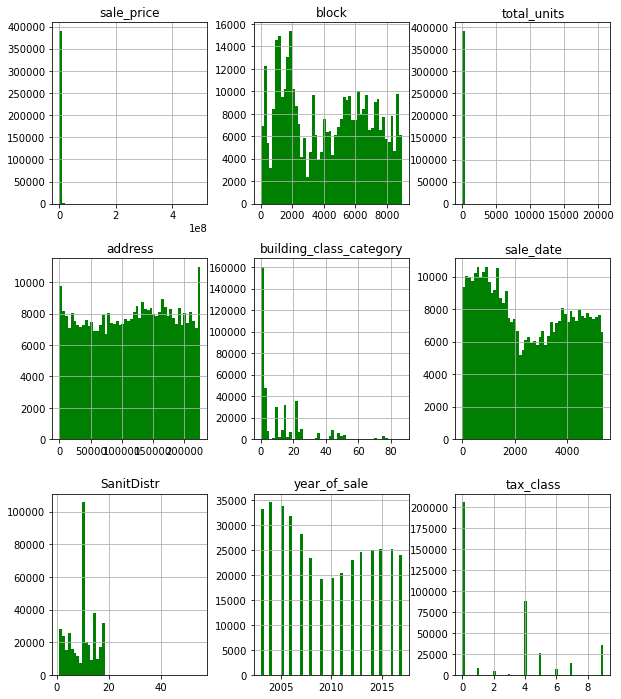

In [29]:
data=df[['sale_price','block','total_units','address','building_class_category','sale_date','SanitDistr','year_of_sale', 'tax_class']]
data.hist(figsize=(10,12),color="g",bins=50);

*Распределение хорошое*

### ОТБОР ПРИЗНАКОВ

*Избавлюсь от признаков имеющие большую зависимость с целевым признаком*

In [30]:
cdf2=df.drop('sale_price', axis=1)
for col in cdf2.columns:
    x = np.array(df['sale_price'])
    y = np.array(cdf2[col])
    corr=np.corrcoef(x, y)[0, 1]
    if corr>0.3:
        del cdf2[col]
        print('{}: {}'.format(col, corr))

### РАЗБИЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ

*Нормализую данные*

In [31]:
scaler=scal.fit_transform(cdf2)

In [32]:
x=scaler.copy()
y=df['sale_price']

In [33]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4, random_state=10)

### ПРОГНОЗИРОВАНИЕ

*SGD*

In [34]:
sgd=SGDClassifier(random_state=20,epsilon=0.01)

In [35]:
sgd.fit(x_train ,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.01, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=20, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred=sgd.predict(x_test)

In [ ]:
sgd.score(x_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

### РАЗРАБОТКА ЧАТ-БОТА

In [38]:
data=df[['neighborhood','building_class_category','tax_class','block','sale_price','address','gross_sqft','year_built']]

In [39]:
def chat_bot_comand():
    for col in data.columns:
        print('comand-/{}'.format(col))
    print('comand-/predict_sale_price')

In [40]:
chat_bot_comand()

comand-/neighborhood
comand-/building_class_category
comand-/tax_class
comand-/block
comand-/sale_price
comand-/address
comand-/gross_sqft
comand-/year_built
comand-/predict_sale_price


In [42]:
def fit_and_evaluate(model):
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    model_mae = mae(y_test, model_pred)
    return model_mae


def chat_bot_predict_sale_price():
    for col in data.columns:
        print('Введити характеристику:',col)
        haracteristic=input()
    if haracteristic == df[col]:
        print('{}-predict the cost'.format(pred))

In [43]:
chat_bot_predict_sale_price()

Введити характеристику: neighborhood
1 
Введити характеристику: building_class_category
3
Введити характеристику: tax_class
4
Введити характеристику: block
6
Введити характеристику: sale_price
3
Введити характеристику: address
6
Введити характеристику: gross_sqft
3
Введити характеристику: year_built
8


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [44]:
for col in df.columns:
    print(df[col])

0              1
1              2
2              3
3              4
4              5
           ...  
390878    390879
390879    390880
390880    390881
390881    390882
390882    390883
Name: Unnamed: 0, Length: 390883, dtype: int64
0         25
1         23
2         10
3         44
4         10
          ..
390878    63
390879    63
390880    63
390881     0
390882     0
Name: neighborhood, Length: 390883, dtype: int32
0         45
1         47
2         34
3         36
4         42
          ..
390878    51
390879    51
390880    70
390881     3
390882     3
Name: building_class_category, Length: 390883, dtype: int32
0         9
1         9
2         9
3         9
4         9
         ..
390878    0
390879    0
390880    9
390881    0
390882    0
Name: tax_class, Length: 390883, dtype: int32
0          140
1           54
2          204
3         8470
4          230
          ... 
390878    3337
390879    3337
390880    3280
390881    6886
390882    6886
Name: block, Length: 390883,

0         1
1         0
2         0
3         0
4         0
         ..
390878    0
390879    0
390880    0
390881    1
390882    1
Name: SanitBoro_ismissing, Length: 390883, dtype: int64
0         1
1         0
2         0
3         0
4         0
         ..
390878    0
390879    0
390880    0
390881    1
390882    1
Name: SanitDistr_ismissing, Length: 390883, dtype: int64
0         1
1         0
2         0
3         0
4         0
         ..
390878    0
390879    0
390880    1
390881    1
390882    1
Name: LandUse_ismissing, Length: 390883, dtype: int64
0         1
1         0
2         0
3         0
4         0
         ..
390878    0
390879    0
390880    0
390881    1
390882    1
Name: Easements_ismissing, Length: 390883, dtype: int64
0         1
1         0
2         0
3         0
4         0
         ..
390878    0
390879    0
390880    0
390881    1
390882    1
Name: LotArea_ismissing, Length: 390883, dtype: int64
0         1
1         0
2         0
3         0
4         0
   

In [45]:
data.head()

,neighborhood,building_class_category,tax_class,block,sale_price,address,gross_sqft,year_built
0,25,45,9,140,499401179.0,130856,0.0,2002
1,23,47,9,54,345000000.0,208471,0.0,0
2,10,34,9,204,340000000.0,119217,304650.0,1924
3,44,36,9,8470,276947000.0,164330,2548000.0,1970
4,10,42,9,230,202500000.0,84851,356000.0,1927


### ПРЕДОБРАБОТКА ДАННЫХ

In [ ]:
year = {2003:1, 2004:2, 2005:3, 2006:4, 2007:5, 2008:6, 2009:7, 2010:8, 2011:9,
          2012:10, 2013:11, 2014:12, 2015:13, 2016:14, 2017:15}
 
for col in year:
    print(col,"y=",round(df[(df["year_of_sale"] ==col)]["sale_price"].mean()),"$")